# Konum Ölçüleri
Konum ölçüleri, analiste verinin merkezinin veya başka nir konumun bulunduğu yerin nicel değerini elde etmeye yarar.

In [10]:
import random
import datetime

sd = datetime.datetime.timestamp(datetime.datetime.now()) * 1000
random.seed(sd)

veri = [random.randint(10, 100) for _ in range(30)]
veri.sort()

print(veri)

[10, 13, 14, 15, 17, 19, 20, 22, 24, 35, 39, 40, 43, 53, 53, 54, 55, 78, 81, 82, 82, 83, 86, 87, 90, 92, 94, 96, 99, 99]


In [11]:
veri = [10, 14, 14, 17, 21, 21, 24, 27, 28, 30, 33, 35, 38, 41, 41, 42, 49, 51, 53, 54, 54, 60, 62, 71, 74, 76, 77, 77,
        79, 87]

In [12]:
# Ortalama
import statistics

statistics.mean(veri)

45.333333333333336

In [13]:
# Medyan
# Örneklemin merkezi eğilimini aşırı (aykurı) değerlerden etkilenmeyecek şekilde yansıtmaktır.
# Öncelikle küçükten, büyüğe sıralama
# n tek ise -> ortadaki gözlem
# n çit ise -> ortadaki iki gözlemin aritmatik ırtalması

statistics.median(veri)

41.5

In [14]:
# Mod: tepe noktası. En çok tekrarlayan değer
statistics.multimode(veri)

[14, 21, 41, 54, 77]

In [15]:
# Çeyrekler / Kartiller / Quartiles
# Q1: en küçük %25 i ayıran değer = .25 * (n+1) inci değer
# Q2: en küçük %50 yi ayıran değer = medyan = .50 * (n+1)
# Q3: en küçük %75 i ayıran değer = .75 * (n + 1)

# Nasıl hesaplıyoruz
# örneğin veride 12 rakam var
# bu durumda .25 * (12 + 1) = 3.25 inci değeri bulmalız
# varsayalım 3. değer : 65, 4. değer ise 67 olsun
# Q1 = 65 + .25 * (67-65) = 65.5 olacaktır

statistics.quantiles(veri)

[26.25, 41.5, 64.25]

Bir örneklemin beş sayılı özeti
* min
* Q1
* Q2
* Q3
* max

In [52]:
veriSeti = [60, 63, 65, 67, 70, 72, 75, 75, 80, 82, 84, 85]

qs = statistics.quantiles(veriSeti)
med = statistics.median(veriSeti)
print("Ortalama: ", round(statistics.mean(veriSeti), 2),
      " :: Medyan", med,
      " :: 5 Sayılı Özet:", veriSeti[0], qs[0], qs[1], qs[2], veriSeti[-1])

# Veriye extrem bir değer / aykırı bir gözlem ekleyelim
veriSetiExtrem = [60, 63, 65, 67, 70, 72, 75, 75, 80, 82, 84, 85, 1000]
qs = statistics.quantiles(veriSetiExtrem)
med = statistics.median(veriSetiExtrem)
print("Ortalama: ", round(statistics.mean(veriSetiExtrem), 2),
      " :: Medyan", med,
      " :: 5 Sayılı Özet:", veriSetiExtrem[0], qs[0], qs[1], qs[2], veriSetiExtrem[-1])

Ortalama:  73.17  :: Medyan 73.5  :: 5 Sayılı Özet: 60 65.5 73.5 81.5 85
Ortalama:  144.46  :: Medyan 75  :: 5 Sayılı Özet: 60 66.0 75.0 83.0 1000


In [45]:
# standard numpy and matplotlib library imports
import numpy as np
import matplotlib.pyplot as plt

def dotplot(input_x, **args):
    # Count how many times does each value occur
    unique_values, counts = np.unique(input_x, return_counts=True)

    # Convert 1D input into 2D array
    scatter_x = [] # x values
    scatter_y = [] # corresponding y values
    for idx, value in enumerate(unique_values):
        for counter in range(1, counts[idx]+1):
            scatter_x.append(value)
            scatter_y.append(counter)

    # draw dot plot using scatter()
    plt.scatter(scatter_x, scatter_y, **args)

    # Optional - show all unique values on x-axis.
    # Matplotlib might hide some of them
    plt.gca().set_xticks(unique_values)

In [30]:
nitrojen_yok = [.32, .53, .28, .37, .47, .43, .36, .42, .38, .43]
nitrojen_var = [.26, .43, .47, .49, .52, .75, .79, .86, .62, .46]

print("Nitrojen Yok Ortalama, Mod, Medyan", statistics.mean(nitrojen_yok), statistics.median(nitrojen_yok), statistics.mode(nitrojen_yok))
print("Nitrojen Var Ortalama, Mod, Medyan", statistics.mean(nitrojen_var), statistics.median(nitrojen_var), statistics.mode(nitrojen_var))

Nitrojen Yok Ortalama, Mod, Medyan 0.399 0.4 0.43
Nitrojen Var Ortalama, Mod, Medyan 0.565 0.505 0.26


Her iki veri setinin de mod, medyan ve ortalama değerleri çok benzer. Bir de görsel olarak bakalım

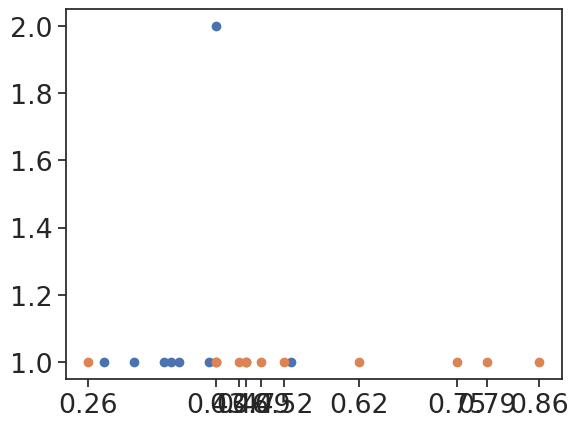

In [50]:
dotplot(input_x=nitrojen_yok)
dotplot(input_x=nitrojen_var)

# Grafikten görüldüğü üzere, nitrojen_var veri setinin değişkenliği nitrojen_yok'tan çok daha fazla.

# Değişkenlik Ölçüleri (Measures Of Variation)

Örneklem değişkenliği veri analizinde önemli bir rol oynar.

Küçük veri analizi problemlerinde bile, belirli bir istatistiksel yöntemin başarısı, örneklemdeki gözlemler arasındaki değişkenliğin büyüklüğüne bağlı olabilir. Bir örneklemdeki konum ölçüleri, bir veri kümesinin uygun bir özetini sağlamayabilir. Örneğin, bir önceki örnekte, örneklem değişkenliğini hesaba katmadan azot kullanımının büyümeyi arttırdığı sonucuna varamayız.

Pek çok konum ölçüsü olduğu gibi birçok değişkenlik (veya yayılım, saçılım, dağılım) ölçüsü de vardır.


In [53]:
# Açıklık (Range)
tmpData = np.array(veriSeti)
tmpData.max() - tmpData.min()

25

In [54]:
# IQR : Interquartile Range
# IQR, verilerin orta %50’sindeki yayılımı ölçer
qs = statistics.quantiles(veriSeti)
qs[2] - qs[0]

8.0

In [56]:
# Varyans
# s2 ile gösterilen örneklem varyansı, her gözlem ile örneklem ortalaması (x̄) arasındaki
# farkların karelerinin toplamının örneklem büyüklüğünün bir eksiğine bölünmesiyle elde
# n-1 --> degree of freedom

statistics.variance([3,0,-2,-1,5,10])

20.3

In [58]:
# Standart sapma
# s = sqrt(s2)

round(statistics.stdev([3,0,-2,-1,5,10]), 2)

4.51